# ML model to predict 10-year risk of future Coronary Heart Disease(CHD)

### Importing Necessary Libraries

In [367]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

### Reading the DataSet

In [368]:
# Reading the dataset
df=pd.read_csv("major_project.csv")

In [369]:
df.head(10)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [370]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [371]:
df.dtypes

Gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
Gender             4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


### Checking for Null Values in the Set and modifying them

In [373]:
df.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [374]:
mean_education=round(df.education.mean(),2)
mean_BPMeds=round(df.BPMeds.mean(),2)
mean_cigsPerDay=round(df.cigsPerDay.mean(),2)
mean_totChol=round(df.totChol.mean(),2)
mean_BMI=round(df.BMI.mean(),2)
mean_heartRate=round(df.heartRate.mean(),2)
mean_glucose=round(df.glucose.mean(),2)

print(mean_education)
print(mean_BPMeds)
print(mean_cigsPerDay)
print(mean_totChol)
print(mean_BMI)
print(mean_heartRate)
print(mean_glucose)

1.98
0.03
9.01
236.7
25.8
75.88
81.96


In [375]:
df.shape

(4240, 16)

In [376]:
df.dropna(how='all').shape

(4240, 16)

In [377]:
df['education'].fillna(mean_education,inplace=True)

In [378]:
df['BPMeds'].fillna(mean_BPMeds,inplace=True)

In [379]:
df['cigsPerDay'].fillna(mean_cigsPerDay,inplace=True)

In [380]:
df['totChol'].fillna(mean_totChol,inplace=True)

In [381]:
df['BMI'].fillna(mean_BMI,inplace=True)

In [382]:
df['heartRate'].fillna(mean_heartRate,inplace=True)

In [383]:
df['glucose'].fillna(mean_glucose,inplace=True)

In [384]:
df.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [385]:
df.head(20)

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.00,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.00,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.00,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.00,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.00,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.00,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.00,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.00,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.00,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.00,0


### Identifying for Outliers

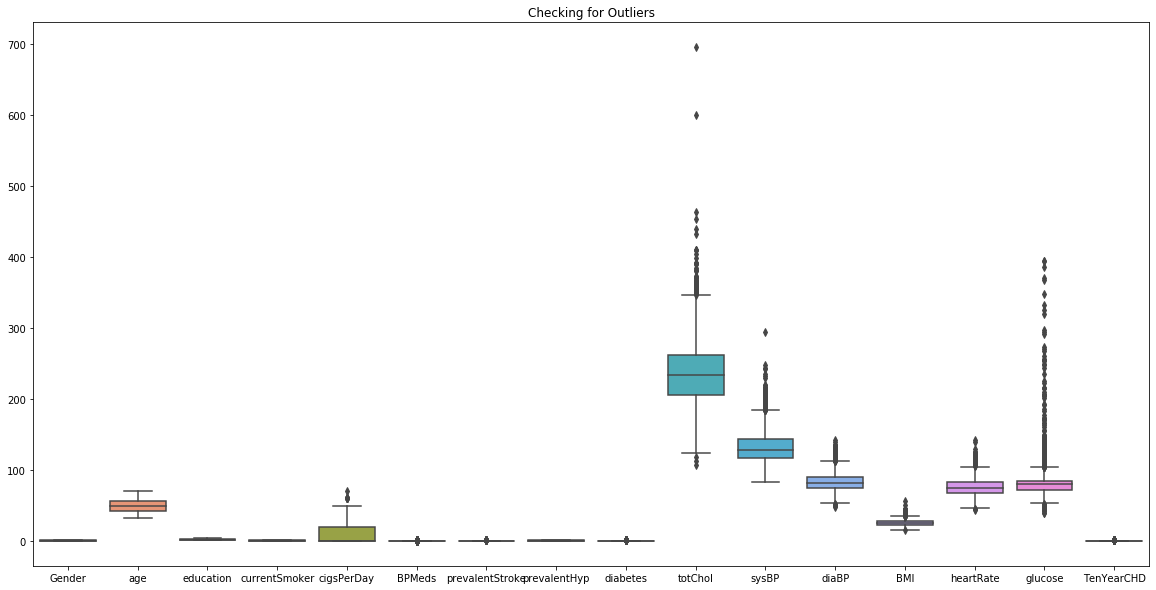

In [386]:
plt.figure(figsize=(20,10))
plt.title("Checking for Outliers")
sns.boxplot(data=df)

#### from the plot we can say that there are some ouliers in totChol, sysBP and glucose to be removed

In [387]:
df.shape

(4240, 16)

In [388]:
from scipy import stats
z = np.abs(stats.zscore(df))

In [389]:
df = df[(z < 3).all(axis=1)]

In [390]:
df.shape

(3847, 16)

##### Since after removing the outliers we have 3847 tuples ...

In [391]:
df.drop('education',axis=1,inplace=True)

##### Since identifying the 10-year CHD doesnot require whether a person is educated or not ..

In [392]:
df.columns

Index(['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Basic Statistics

In [393]:
df.describe()

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.0,3847.000000,3847.0,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000,3847.000000
mean,0.434624,49.107616,0.504029,9.045303,0.000351,0.0,0.266441,0.0,234.775799,129.759683,81.775929,25.477447,75.369348,79.592035,0.134130
std,0.495772,8.471350,0.500049,11.552410,0.003226,0.0,0.442155,0.0,41.454163,19.076880,10.772337,3.596212,11.412308,12.129497,0.340837
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,205.000000,116.000000,74.000000,23.010000,68.000000,72.000000,0.000000
50%,0.000000,48.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,233.000000,127.000000,81.000000,25.230000,75.000000,79.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.0,1.000000,0.0,261.000000,140.750000,88.000000,27.760000,82.000000,85.000000,0.000000
max,1.000000,69.000000,1.000000,43.000000,0.030000,0.0,1.000000,0.0,367.000000,198.000000,118.000000,37.580000,110.000000,142.000000,1.000000


In [394]:
df.shape

(3847, 15)

### Data Splitting

In [395]:
#Splitting data into Dependent and Independent sets
X = df.iloc[:, :-1].values  
y = df.iloc[:,-1].values  

In [396]:
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y)

In [397]:
#Splitttin gthe data for training and testing
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.4, random_state=0) 

In [398]:
#Normalized the data (ranging from 0 to 1)
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)

In [399]:
X_test=mm_scaler.transform(X_test)

### Logsitc Regression Model

In [400]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()  
regressor.fit(X_train, y_train) 
y_pred=regressor.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


C:\Users\Vamsi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [401]:
print("Logisitc Regression")
print ('Confusion Matrix :'  ,confusion_matrix(y_test, y_pred)) 
LR_accuracy=accuracy_score(y_test, y_pred)*100
print ('Accuracy Score :', LR_accuracy) 
print ('Report : ') 
print (classification_report(y_test, y_pred))

Logisitc Regression
Confusion Matrix : [[1327    0]
 [ 208    4]]
Accuracy Score : 86.48473034437947
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1327
           1       1.00      0.02      0.04       212

    accuracy                           0.86      1539
   macro avg       0.93      0.51      0.48      1539
weighted avg       0.88      0.86      0.80      1539



### Random Forest Model

In [402]:
from sklearn.ensemble import RandomForestClassifier 
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train,y_train) 
yPred=classifier.predict(X_test)
print(yPred)

C:\Users\Vamsi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0 0 0 ... 0 0 0]


In [403]:
print("Random Forest Classifier")
print ('Confusion Matrix :'  ,confusion_matrix(y_test, yPred)) 
RF_accuracy=accuracy_score(y_test, yPred)*100
print ('Accuracy Score :', RF_accuracy) 
print ('Report : ') 
print (classification_report(y_test, yPred))

Random Forest Classifier
Confusion Matrix : [[1312   15]
 [ 208    4]]
Accuracy Score : 85.51007147498375
Report : 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1327
           1       0.21      0.02      0.03       212

    accuracy                           0.86      1539
   macro avg       0.54      0.50      0.48      1539
weighted avg       0.77      0.86      0.80      1539



### K-Nearest Neighbors Model

In [404]:
from sklearn.neighbors import KNeighborsClassifier
kclassifier=KNeighborsClassifier(n_neighbors=1)
kclassifie=kclassifier.fit(X_train,y_train)
ky_pred=kclassifier.predict(X_test)
print(y_test)
print(ky_pred)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [405]:
print("KNeighborsClassifier")
print ('Confusion Matrix :'  ,confusion_matrix(y_test, ky_pred)) 
KN_accuracy=accuracy_score(y_test, ky_pred)*100
print ('Accuracy Score :', KN_accuracy) 
print ('Report : ') 
print (classification_report(y_test, ky_pred))

KNeighborsClassifier
Confusion Matrix : [[1200  127]
 [ 176   36]]
Accuracy Score : 80.31189083820662
Report : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1327
           1       0.22      0.17      0.19       212

    accuracy                           0.80      1539
   macro avg       0.55      0.54      0.54      1539
weighted avg       0.78      0.80      0.79      1539



### Decision Tree model 

In [406]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier=DecisionTreeClassifier(max_depth=30)
model=treeClassifier.fit(X_train,y_train)
t_pred=treeClassifier.predict(X_test)
print(y_test)
print(y_pred)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [407]:
print("Decision Tree Classifier")
print ('Confusion Matrix :'  ,confusion_matrix(y_test, t_pred)) 
DT_accuracy=accuracy_score(y_test, t_pred)*100
print ('Accuracy Score :', DT_accuracy) 
print ('Report : ') 
print (classification_report(y_test, t_pred))

Decision Tree Classifier
Confusion Matrix : [[1155  172]
 [ 174   38]]
Accuracy Score : 77.51786874593893
Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1327
           1       0.18      0.18      0.18       212

    accuracy                           0.78      1539
   macro avg       0.53      0.52      0.52      1539
weighted avg       0.77      0.78      0.77      1539



### Evaluating the models

In [408]:
model=pd.DataFrame({'Model_Name':['LogisiticRegression','Random Forest','K-Nearest Neighbors','Decision Tree'],
                    'Accuracy':[LR_accuracy,RF_accuracy,KN_accuracy,DT_accuracy]})
model

,Model_Name,Accuracy
0,LogisiticRegression,86.484730
1,Random Forest,85.510071
2,K-Nearest Neighbors,80.311891
3,Decision Tree,77.517869


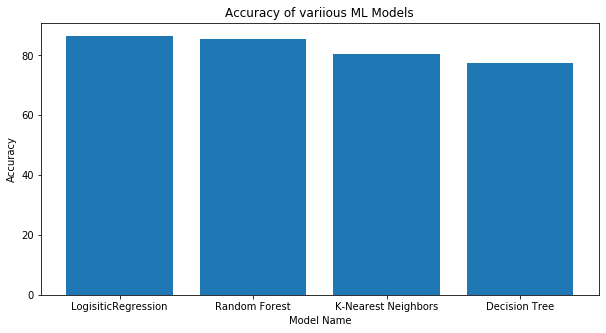

In [409]:
plt.figure(figsize=(10,5))
plt.title("Accuracy of variious ML Models")
plt.ylabel("Accuracy")
plt.xlabel("Model Name")
plt.bar(model['Model_Name'],model['Accuracy'])
plt.show()